### Garbage Classification
#### This notebook deals with classifying garbage into 6 classes using the Garbage Classification dataset from Kaggle. This dataset has around 2300 images with classes belonging to carboard, plastic, glass, metal, paper and trash.

#### Check for GPU

In [48]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [49]:
!nvidia-smi

Wed Dec  9 08:11:06 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    35W /  70W |   3301MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [50]:
import tensorflow as tf
tf.test.is_gpu_available()


True

### Mount the drive

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
!ls "/content/drive/My Drive/"

 ADS255_6118.zip		      'ML Books'
 app.py				      'ML Project 1'
 archive.zip			      'MS and MBA related SOPs'
 AWS_SAA.gdoc			       OnlineCourses
'Being a Hipster in a Pandemic.docx'   Project_Worksheet.gsheet
 BestArticleLinks4ML.gsheet	       Reactjs.gsheet
'Colab Notebooks'		       report.docx
'Course Work'			       Resume_SaiSantoshBoga.docx
 DATA294_Abstract.gslides	       ShoppingTracker.gsheet
'Deep Learning'			       UnknownTerms_Demystified.gsheet
 final.ipynb			       Untitled1.ipynb
 FlighFares.gsheet		      'Untitled document (1).gdoc'
 Garbage_Classification		      'Untitled document.gdoc'
'Getting started.pdf'		       yolo_custom_model_Training
 Mediator_PC


In [ ]:
!ls


drive  labels.txt  sample_data


In [53]:
!ls "/content/drive/My Drive/Garbage_Classification"

'Garbage classification'	       one-indexed-files-notrash_val.txt
 GarbageClassification.ipynb	       one-indexed-files.txt
 MimicNotebook1_rashmi.ipynb	       trained_model1.h5
 one-indexed-files-notrash_test.txt    trained_model.h5
 one-indexed-files-notrash_train.txt   zero-indexed-files.txt


In [54]:
!ls '/content/drive/My Drive/Garbage_Classification/Garbage classification/Garbage classification'

cardboard  glass  metal  paper	plastic  trash


### Setting the directory path

In [55]:
dir_path = '/content/drive/My Drive/Garbage_Classification/Garbage classification/Garbage classification'

### Displaying the train images

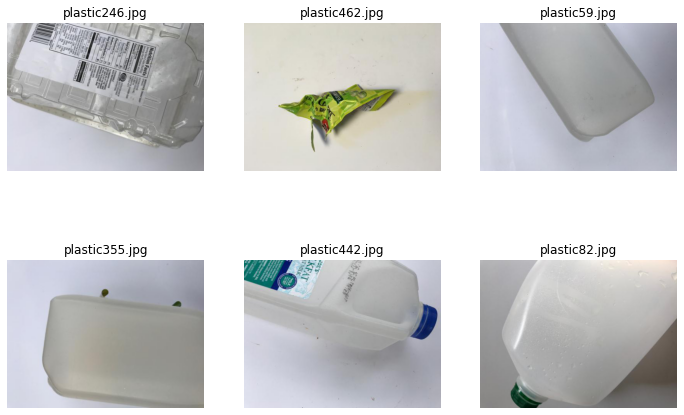

In [56]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import glob
import os

def read_label(image_path):
  #file_name = image_path.replace('.jpg', '.txt')
  file_name = image_path
  with open(file_name, 'rt') as file:
    print(os.path.basename(file_name) + ': \n' + file.read())

image_path = glob.glob("/content/drive/My Drive/Garbage_Classification/Garbage classification/Garbage classification/plastic/*.jpg")
fig = plt.figure(figsize=(12,8))
cols = 3
rows = 2
grid = gridspec.GridSpec(nrows=rows, ncols=cols, figure=fig)
for i in range(cols*rows):
  fig.add_subplot(grid[i])
  image=plt.imread(image_path[i+20])
  plt.title(os.path.basename(image_path[i+20]))
  plt.axis(False)
  plt.imshow(image)
  #read_label(image_path[i])

In [57]:
import os
import glob
img_list = glob.glob(os.path.join(dir_path, '*/*.jpg'))


In [58]:
len(img_list[0])

118

### Splitting the data into train and test data using ImageDataGenerator

In [59]:
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Dense, Flatten,Conv2D,pooling,MaxPooling2D,Dropout,SpatialDropout2D
from keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img,load_img
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [60]:
train=ImageDataGenerator(horizontal_flip=True,
                         vertical_flip=True,
                         validation_split=0.1,
                         rescale=1./255,
                         shear_range = 0.1,
                         zoom_range = 0.1,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1,)

test=ImageDataGenerator(rescale=1/255,
                        validation_split=0.1,
                        )


In [61]:
train_generator=train.flow_from_directory(dir_path,
                                          target_size=(300,300),
                                          batch_size=32,
                                          class_mode='categorical',
                                          subset='training')

test_generator=test.flow_from_directory(dir_path,
                                        target_size=(300,300),
                                        batch_size=32,
                                        class_mode='categorical',
                                        subset='validation',
                                        shuffle = False)

labels = (train_generator.class_indices)
print(labels)

labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}
{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


### Writing the labels

#### Displaying the classes or labels for the dataset

In [62]:
print (train_generator.class_indices)

Labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(Labels)

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


In [63]:
!ls "/content/drive/My Drive/Garbage_Classification"

'Garbage classification'	       one-indexed-files-notrash_val.txt
 GarbageClassification.ipynb	       one-indexed-files.txt
 MimicNotebook1_rashmi.ipynb	       trained_model1.h5
 one-indexed-files-notrash_test.txt    trained_model.h5
 one-indexed-files-notrash_train.txt   zero-indexed-files.txt


### Defining the Model and adding conv and pooling layers for classification

In [ ]:
model=Sequential()
#Convolution blocks

model.add(Conv2D(32,(3,3), padding='same',input_shape=(300,300,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 
#model.add(SpatialDropout2D(0.5)) # No accuracy

model.add(Conv2D(64,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 
#model.add(SpatialDropout2D(0.5))

model.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

model.add(Conv2D(16,(3,3), padding='same',activation='relu'))
#Classification layers
model.add(Flatten())

model.add(Dense(64,activation='relu'))
#model.add(SpatialDropout2D(0.5))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))

filepath="/content/drive/My Drive/Garbage_Classification/trained_model1.h5"
checkpoint1 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint1]

### Model Architecture

In [ ]:
model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 75, 75, 32)        18464     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 37, 37, 16)       

### Training the model

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc']) # RMS PROP - No accuracy

#es=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

In [64]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
history = model.fit_generator(train_generator,
                              epochs=100,
                              steps_per_epoch=2276//32,
                              validation_data=test_generator,
                              validation_steps=251//32,
                              workers = 4,
                              callbacks=callbacks_list) 


Epoch 1/100
71/71 [==============================] - ETA: 0s - loss: 1.7650 - acc: 0.2108
Epoch 00001: val_acc improved from -inf to 0.24107, saving model to /content/drive/My Drive/Garbage_Classification/trained_model1.h5
71/71 [==============================] - 45s 630ms/step - loss: 1.7650 - acc: 0.2108 - val_loss: 1.7060 - val_acc: 0.2411
Epoch 2/100
71/71 [==============================] - ETA: 0s - loss: 1.7061 - acc: 0.2473
Epoch 00002: val_acc improved from 0.24107 to 0.26339, saving model to /content/drive/My Drive/Garbage_Classification/trained_model1.h5
71/71 [==============================] - 44s 624ms/step - loss: 1.7061 - acc: 0.2473 - val_loss: 1.6071 - val_acc: 0.2634
Epoch 3/100
71/71 [==============================] - ETA: 0s - loss: 1.6176 - acc: 0.2946
Epoch 00003: val_acc improved from 0.26339 to 0.34821, saving model to /content/drive/My Drive/Garbage_Classification/trained_model1.h5
71/71 [==============================] - 45s 633ms/step - loss: 1.6176 - acc: 0.2

### Loading the trained model and using it to make predictions

In [65]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/My Drive/Garbage_Classification/trained_model1.h5')


Maximum Probability:  0.980224
Classified: plastic


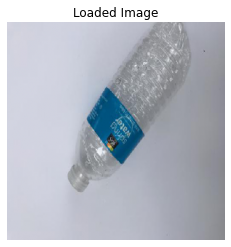

In [66]:
from keras.preprocessing import image
from matplotlib import pyplot as plt
import numpy as np
labels = {0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}

img_path = '/content/drive/My Drive/Garbage_Classification/Garbage classification/Garbage classification/plastic/plastic75.jpg'

img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0

plt.title("Loaded Image")
plt.axis('off')
plt.imshow(img.squeeze())

p=model.predict(img[np.newaxis, ...])
print("Maximum Probability: ",np.max(p[0], axis=-1))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:",predicted_class)

### Model Evaluation

In [67]:
model.evaluate(test_generator)

8/8 [==============================] - 1s 137ms/step - loss: 0.6827 - acc: 0.7610


[0.6826918125152588, 0.7609561681747437]

In [69]:
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)


In [71]:
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys()) 

In [72]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

   cardboard       0.91      0.72      0.81        40
       glass       0.74      0.84      0.79        50
       metal       0.70      0.73      0.71        41
       paper       0.79      0.92      0.85        59
     plastic       0.72      0.54      0.62        48
       trash       0.67      0.77      0.71        13

    accuracy                           0.76       251
   macro avg       0.75      0.75      0.75       251
weighted avg       0.76      0.76      0.76       251



In [75]:
print("Accuracy of the model is", accuracy_score(true_classes, predicted_classes)*100)

Accuracy of the model is 76.09561752988047
